In [1]:
import socket
import spynnaker8 as p
from pyNN.random import NumpyRNG, RandomDistribution
from pyNN.utility.plotting import Figure, Panel
import matplotlib.pyplot as plt
import os
import time
import numpy as np
from numpy import genfromtxt


import sys
sys.path.insert(1, '../../miscelaneous')
from spinnorse_tools import fetch_files, plot_in_v_out

Detected PyNN version 0.9.4 and Neo version 0.6.1


In [2]:
dt = 1           # (ms) simulation timestep

cell_params = {'tau_m': 20.0,
               'tau_syn_E': 5.0,
               'tau_syn_I': 5.0,
               'v_rest': -65.0,
               'v_reset': -65.0,
               'v_thresh': -50.0,
               'tau_refrac': 0.0, # 0.1 originally
               'cm': 1,
               'i_offset': 0.0
               }

w = 1.0

2020-12-26 13:35:59 INFO: Read cfg files: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg, /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg, /home/jprb/.spynnaker.cfg
2020-12-26 13:35:59 INFO: Will search these locations for binaries: /home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/common_model_binaries : /home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/model_binaries
2020-12-26 13:35:59 INFO: Setting time scale factor to 1.
2020-12-26 13:35:59 INFO: Setting machine time step to 1000 micro-seconds.
2020-12-26 13:35:59 INFO: Simulating for 200 1.0ms timesteps using a hardware timestep of 1000us
2020-12-26 13:35:59 INFO: Starting execution process
2020-12-26 13:35:59 INFO: Creating transceiver for 192.168.240.1
2020-12-26 13:35:59 INFO: Working out if machine is booted
2020-12-26 13:35:59 INFO: Found board with version [Version: SC&MP 3.2.5 at SpiNNaker:0:0:0 (built Thu Aug  1 10:15:06

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:35:59 INFO: Detected a machine on IP address 192.168.240.1 which has 858 cores and 120.0 links
2020-12-26 13:35:59 INFO: Time 0:00:00.018564 taken by MachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2020-12-26 13:35:59 INFO: Time 0:00:00.034149 taken by PreAllocateResourcesForExtraMonitorSupport
2020-12-26 13:35:59 INFO: Time 0:00:00.000321 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-12-26 13:35:59 INFO: Time 0:00:00.016807 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2020-12-26 13:35:59 INFO: Time 0:00:00.005394 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                        

Writing data
|0%                          50%                         100%|
2020-12-26 13:36:11 INFO: Time 0:00:00.024524 taken by WriteMemoryIOData
Executing data specifications and loading data for application vertices
|0%                          50%                         100%|
2020-12-26 13:36:13 INFO: Time 0:00:02.154379 taken by HostExecuteApplicationDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2020-12-26 13:36:17 INFO: Time 0:00:03.749822 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2020-12-26 13:36:17 INFO: Time 0:00:00.031353 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2020-12-26 13:36:24 INFO: Time 0:00:06.762501 taken by LoadApplicationExecutableImages
Reading Routing Tables from Machine
|0%                          50%                         100%|
2020-12-2

2020-12-26 13:36:35 INFO: Time 0:00:00.005342 taken by BoardChipReport
Filtering edges
|0%                          50%                         100%|
2020-12-26 13:36:35 INFO: Time 0:00:00.024870 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:36:35 INFO: Time 0:00:00.030297 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:36:35 INFO: Time 0:00:00.056740 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:36:35 INFO: Time 0:00:00.014479 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:36:35 INFO: Time 0:00:00.002881 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:36:35 INFO: Time 0:00:00.067217 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:36:57 INFO: Time 0:00:00.047264 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:36:57 INFO: Time 0:00:00.028744 taken by ChipRuntimeUpdater
2020-12-26 13:36:57 INFO: Time 0:00:00.000139 taken by DatabaseInterface
2020-12-26 13:36:57 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:36:57 INFO: Time 0:00:00.000470 taken by NotificationProtocol
2020-12-26 13:36:57 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:36:57 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:36:57 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:36:57 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']



2020-12-26 13:37:08 INFO: Time 0:00:00.027401 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-26 13:37:08 INFO: Time 0:00:00.030890 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:37:08 INFO: Time 0:00:00.043080 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:37:08 INFO: Time 0:00:00.005026 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:37:08 INFO: Time 0:00:00.013406 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-26 13:37:32 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-26 13:37:32 INFO: Time 0:00:00.064064 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:37:32 INFO: Time 0:00:00.029141 taken by ChipRuntimeUpdater
2020-12-26 13:37:32 INFO: Time 0:00:00.000157 taken by DatabaseInterface
2020-12-26 13:37:32 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:37:32 INFO: Time 0:00:00.001169 taken by NotificationProtocol
2020-12-26 13:37:32 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:37:32 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:37:32 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:37:43 INFO: Time 0:00:00.028566 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-26 13:37:43 INFO: Time 0:00:00.030165 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:37:43 INFO: Time 0:00:00.050013 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:37:43 INFO: Time 0:00:00.004225 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:37:43 INFO: Time 0:00:00.002884 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-26 13:38:05 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-26 13:38:05 INFO: Time 0:00:00.052445 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:38:05 INFO: Time 0:00:00.026948 taken by ChipRuntimeUpdater
2020-12-26 13:38:05 INFO: Time 0:00:00.000157 taken by DatabaseInterface
2020-12-26 13:38:05 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:38:05 INFO: Time 0:00:00.000473 taken by NotificationProtocol
2020-12-26 13:38:05 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:38:05 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:38:05 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:38:16 INFO: Time 0:00:00.023861 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-26 13:38:16 INFO: Time 0:00:00.032153 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:38:16 INFO: Time 0:00:00.042613 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:38:16 INFO: Time 0:00:00.008377 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:38:16 INFO: Time 0:00:00.005912 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%            

2020-12-26 13:38:39 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-26 13:38:39 INFO: Time 0:00:00.046349 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:38:40 INFO: Time 0:00:00.028339 taken by ChipRuntimeUpdater
2020-12-26 13:38:40 INFO: Time 0:00:00.000190 taken by DatabaseInterface
2020-12-26 13:38:40 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:38:40 INFO: Time 0:00:00.001481 taken by NotificationProtocol
2020-12-26 13:38:40 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:38:40 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:38:40 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:38:51 INFO: Time 0:00:00.032110 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:38:51 INFO: Time 0:00:00.043554 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:38:51 INFO: Time 0:00:00.009411 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:38:51 INFO: Time 0:00:00.004203 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:38:51 INFO: Time 0:00:00.052253 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:39:12 INFO: Time 0:00:00.049725 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:39:12 INFO: Time 0:00:00.027564 taken by ChipRuntimeUpdater
2020-12-26 13:39:12 INFO: Time 0:00:00.000212 taken by DatabaseInterface
2020-12-26 13:39:12 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:39:12 INFO: Time 0:00:00.000645 taken by NotificationProtocol
2020-12-26 13:39:12 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:39:12 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:39:12 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:39:12 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:39:23 INFO: Time 0:00:00.033351 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:39:24 INFO: Time 0:00:00.127249 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:39:24 INFO: Time 0:00:00.005001 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:39:24 INFO: Time 0:00:00.009151 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:39:24 INFO: Time 0:00:00.047151 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:39:45 INFO: Time 0:00:00.047048 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:39:45 INFO: Time 0:00:00.029584 taken by ChipRuntimeUpdater
2020-12-26 13:39:45 INFO: Time 0:00:00.000182 taken by DatabaseInterface
2020-12-26 13:39:45 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:39:45 INFO: Time 0:00:00.000696 taken by NotificationProtocol
2020-12-26 13:39:45 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:39:45 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:39:45 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:39:45 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:39:56 INFO: Time 0:00:00.036933 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:39:56 INFO: Time 0:00:00.037982 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:39:56 INFO: Time 0:00:00.008193 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:39:56 INFO: Time 0:00:00.006702 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:39:57 INFO: Time 0:00:00.048084 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:40:20 INFO: Time 0:00:00.047204 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:40:20 INFO: Time 0:00:00.024388 taken by ChipRuntimeUpdater
2020-12-26 13:40:20 INFO: Time 0:00:00.000166 taken by DatabaseInterface
2020-12-26 13:40:20 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:40:20 INFO: Time 0:00:00.000603 taken by NotificationProtocol
2020-12-26 13:40:20 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:40:20 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:40:20 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:40:20 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:40:31 INFO: Time 0:00:00.035644 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:40:31 INFO: Time 0:00:00.045535 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:40:31 INFO: Time 0:00:00.008337 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:40:31 INFO: Time 0:00:00.006848 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:40:31 INFO: Time 0:00:00.045870 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:40:53 INFO: Time 0:00:00.047625 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:40:53 INFO: Time 0:00:00.025657 taken by ChipRuntimeUpdater
2020-12-26 13:40:53 INFO: Time 0:00:00.000171 taken by DatabaseInterface
2020-12-26 13:40:53 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:40:53 INFO: Time 0:00:00.000678 taken by NotificationProtocol
2020-12-26 13:40:53 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:40:53 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:40:53 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:40:53 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']



2020-12-26 13:41:04 INFO: Time 0:00:00.026524 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-26 13:41:04 INFO: Time 0:00:00.037765 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:41:04 INFO: Time 0:00:00.042729 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:41:04 INFO: Time 0:00:00.007126 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:41:04 INFO: Time 0:00:00.005665 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-26 13:41:26 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-26 13:41:26 INFO: Time 0:00:00.058994 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:41:26 INFO: Time 0:00:00.029336 taken by ChipRuntimeUpdater
2020-12-26 13:41:26 INFO: Time 0:00:00.000345 taken by DatabaseInterface
2020-12-26 13:41:26 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:41:26 INFO: Time 0:00:00.000697 taken by NotificationProtocol
2020-12-26 13:41:26 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:41:26 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:41:26 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:41:37 INFO: Time 0:00:00.032712 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:41:37 INFO: Time 0:00:00.049919 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:41:37 INFO: Time 0:00:00.007794 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:41:37 INFO: Time 0:00:00.006437 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:41:37 INFO: Time 0:00:00.047447 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:42:01 INFO: Time 0:00:00.050740 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:42:01 INFO: Time 0:00:00.028691 taken by ChipRuntimeUpdater
2020-12-26 13:42:01 INFO: Time 0:00:00.000149 taken by DatabaseInterface
2020-12-26 13:42:01 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:42:01 INFO: Time 0:00:00.000596 taken by NotificationProtocol
2020-12-26 13:42:01 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:42:01 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:42:01 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:42:01 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:42:12 INFO: Time 0:00:00.026981 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:42:12 INFO: Time 0:00:00.043997 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:42:12 INFO: Time 0:00:00.007446 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:42:12 INFO: Time 0:00:00.006499 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:42:12 INFO: Time 0:00:00.052927 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:42:34 INFO: Time 0:00:00.046178 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:42:34 INFO: Time 0:00:00.027969 taken by ChipRuntimeUpdater
2020-12-26 13:42:34 INFO: Time 0:00:00.000168 taken by DatabaseInterface
2020-12-26 13:42:34 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:42:34 INFO: Time 0:00:00.000818 taken by NotificationProtocol
2020-12-26 13:42:34 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:42:34 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:42:34 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:42:34 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:42:45 INFO: Time 0:00:00.028079 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:42:45 INFO: Time 0:00:00.043131 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:42:45 INFO: Time 0:00:00.009066 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:42:45 INFO: Time 0:00:00.006881 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:42:45 INFO: Time 0:00:00.051681 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:43:06 INFO: Time 0:00:00.053818 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:43:06 INFO: Time 0:00:00.027766 taken by ChipRuntimeUpdater
2020-12-26 13:43:06 INFO: Time 0:00:00.000171 taken by DatabaseInterface
2020-12-26 13:43:06 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:43:06 INFO: Time 0:00:00.000649 taken by NotificationProtocol
2020-12-26 13:43:06 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:43:06 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:43:06 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:43:06 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']



2020-12-26 13:43:17 INFO: Time 0:00:00.041246 taken by GraphEdgeFilter
Placing graph vertices
|0%                          50%                         100%|
2020-12-26 13:43:17 INFO: Time 0:00:00.032334 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:43:18 INFO: Time 0:00:00.038765 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:43:18 INFO: Time 0:00:00.003941 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:43:18 INFO: Time 0:00:00.002944 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%           

2020-12-26 13:43:41 INFO: Run 1 of 1
Generating SDRAM usage report
|0%                          50%                         100%|
2020-12-26 13:43:41 INFO: Time 0:00:00.054628 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:43:41 INFO: Time 0:00:00.029085 taken by ChipRuntimeUpdater
2020-12-26 13:43:41 INFO: Time 0:00:00.000200 taken by DatabaseInterface
2020-12-26 13:43:41 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:43:41 INFO: Time 0:00:00.000938 taken by NotificationProtocol
2020-12-26 13:43:41 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:43:41 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:43:41 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:43:52 INFO: Time 0:00:00.000248 taken by NetworkSpecificationReport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2020-12-26 13:43:52 INFO: Time 0:00:00.015323 taken by PartitionAndPlacePartitioner
Generating partitioner report
|0%                          50%                         100%|
2020-12-26 13:43:52 INFO: Time 0:00:00.003879 taken by PartitionerReport
Allocating virtual identifiers
|0%                          50%                         100%|
2020-12-26 13:43:52 INFO: Time 0:00:00.024448 taken by MallocBasedChipIDAllocator
Inserting extra monitors into graphs
|0%                          50%                         100%|
2020-12-26 13:43:52 INFO: Time 0:00:00.027909 taken by InsertExtraMonitorVerticesToGraphs
Writing the board chip report
|0%                          50%                         100%|
2020-12-26 13:43:52 INFO: Time

Expanding Synapses
|0%                          50%                         100%|
2020-12-26 13:44:09 INFO: Time 0:00:03.749036 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2020-12-26 13:44:09 INFO: Time 0:00:00.033531 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2020-12-26 13:44:16 INFO: Time 0:00:06.761505 taken by LoadApplicationExecutableImages
Reading Routing Tables from Machine
|0%                          50%                         100%|
2020-12-26 13:44:16 INFO: Time 0:00:00.012300 taken by RoutingTableFromMachineReport
Generating compressed router table report
|0%                          50%                         100%|
2020-12-26 13:44:16 INFO: Time 0:00:00.006280 taken by compressedRoutingTableReports
Generating comparison of router table report
|0%                          50%                         100%|
2020-

['/home/jprb/myspin/lib/python3.6/site-packages/spinn_front_end_common/interface/spinnaker.cfg', '/home/jprb/myspin/lib/python3.6/site-packages/spynnaker/pyNN/spynnaker.cfg', '/home/jprb/.spynnaker.cfg']


2020-12-26 13:44:27 INFO: Time 0:00:00.037836 taken by OneToOnePlacer
Inserting edges between vertices which require FR speed up functionality.
|0%                          50%                         100%|
2020-12-26 13:44:27 INFO: Time 0:00:00.038933 taken by InsertEdgesToExtraMonitorFunctionality
Generating routing tables for data in system processes
|0%                          50%                         100%|
2020-12-26 13:44:27 INFO: Time 0:00:00.006881 taken by DataInMulticastRoutingGenerator
Generating fixed router routes
|0%                          50%                         100%|
2020-12-26 13:44:27 INFO: Time 0:00:00.007511 taken by FixedRouteRouter
Generating placement report
|0%                          50%                         100%|
Generating placement by core report
|0%                          50%                         100%|
2020-12-26 13:44:27 INFO: Time 0:00:00.049592 taken by PlacerReportWithApplicationGraph
Routing
|0%                          50%          

2020-12-26 13:44:49 INFO: Time 0:00:00.050343 taken by SdramUsageReportPerChip
Updating run time
|0%                          50%                         100%|
2020-12-26 13:44:49 INFO: Time 0:00:00.026182 taken by ChipRuntimeUpdater
2020-12-26 13:44:49 INFO: Time 0:00:00.000334 taken by DatabaseInterface
2020-12-26 13:44:49 INFO: ** Notifying external sources that the database is ready for reading **
2020-12-26 13:44:49 INFO: Time 0:00:00.000722 taken by NotificationProtocol
2020-12-26 13:44:49 INFO: *** Running simulation... *** 
Loading buffers
|0%                          50%                         100%|
2020-12-26 13:44:49 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start **
2020-12-26 13:44:49 INFO: ** Sending start / resume message to external sources to state the simulation has started or resumed. **
2020-12-26 13:44:49 INFO: ** Awaiting for a response from an external source to state its ready for the simulation to start *

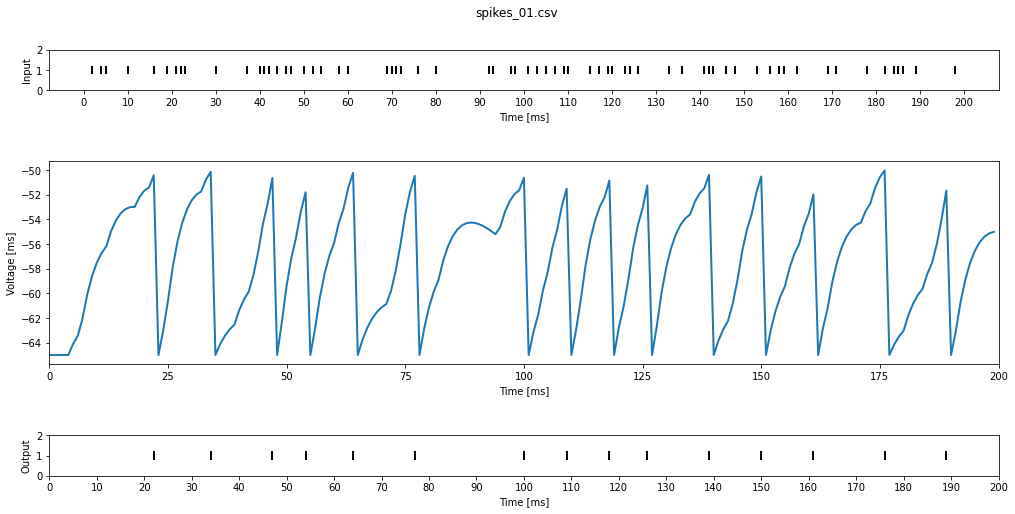

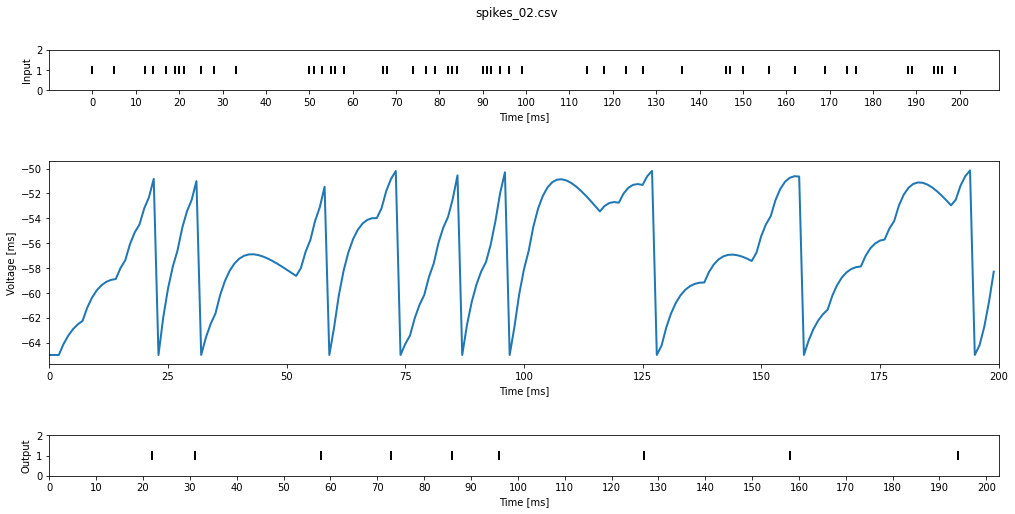

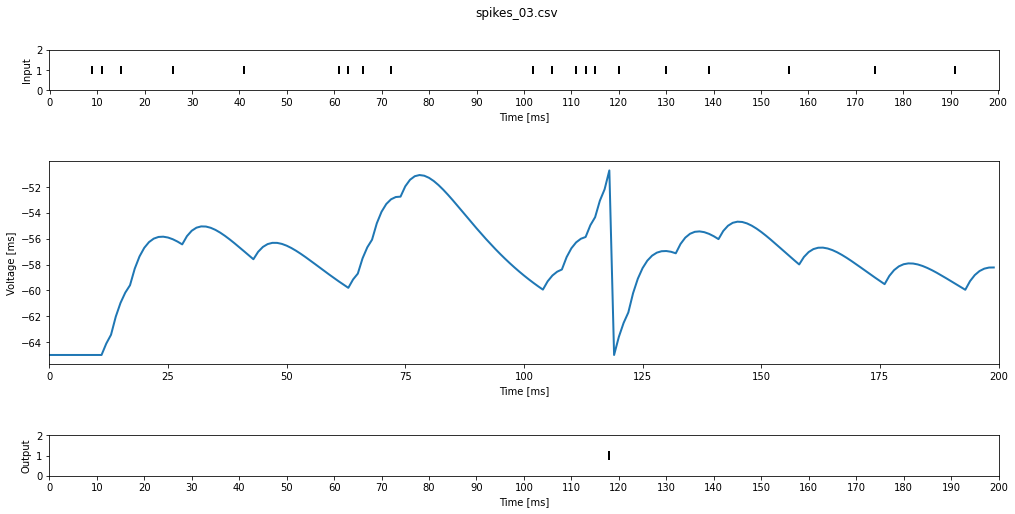

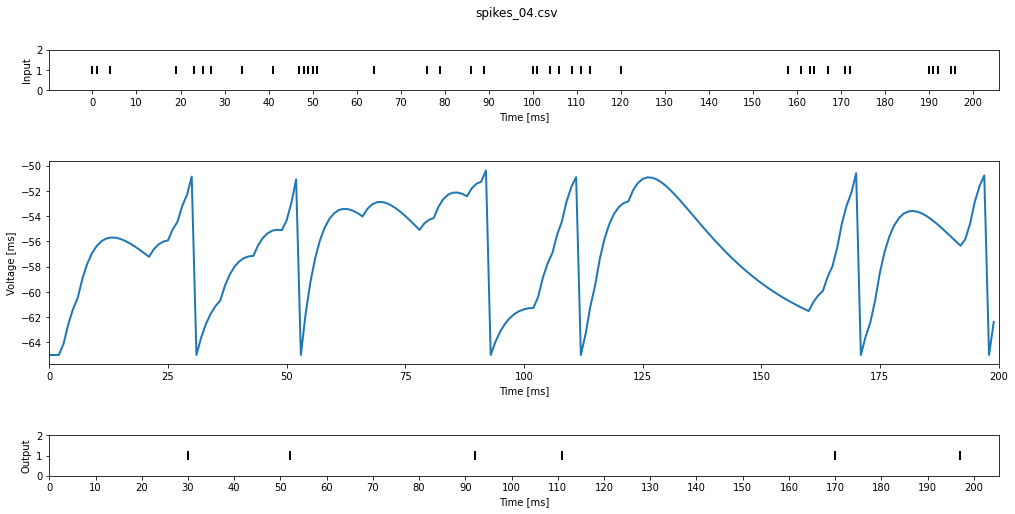

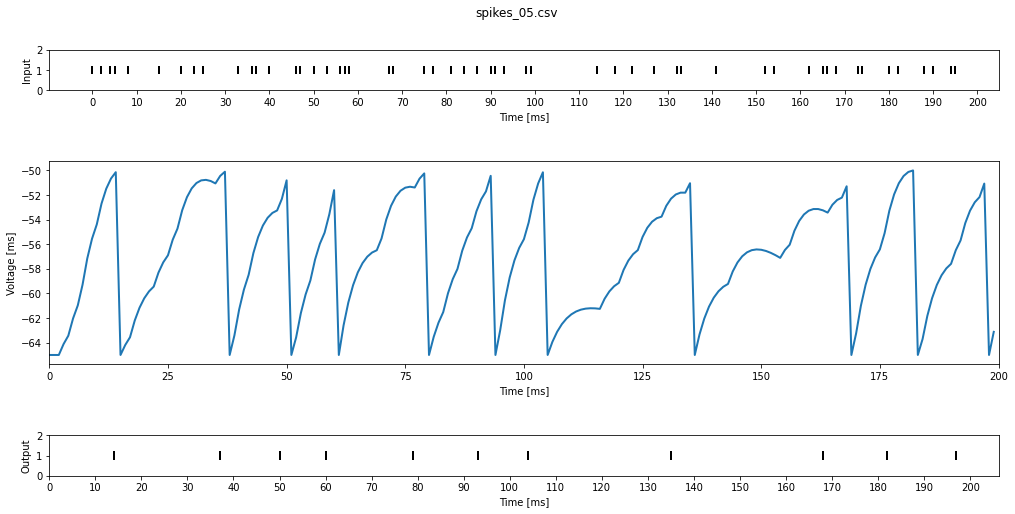

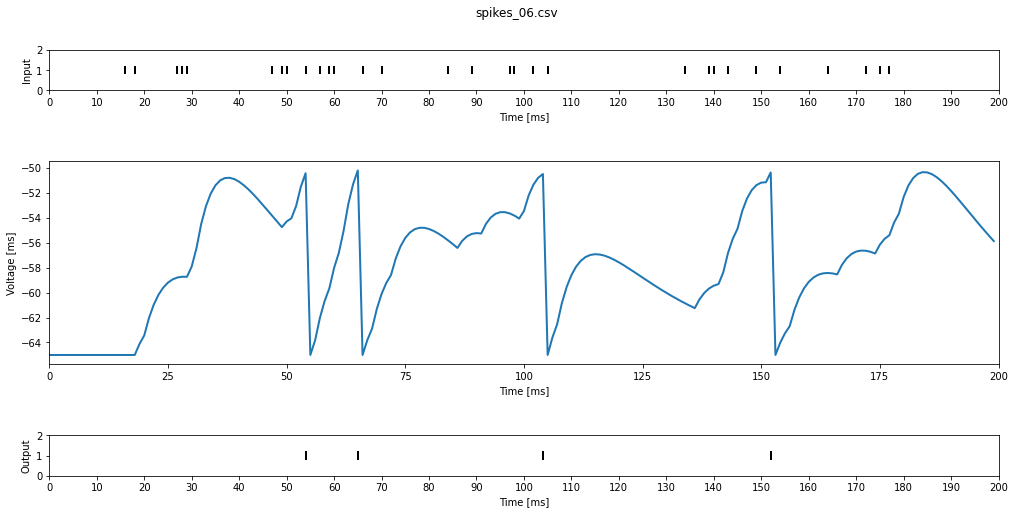

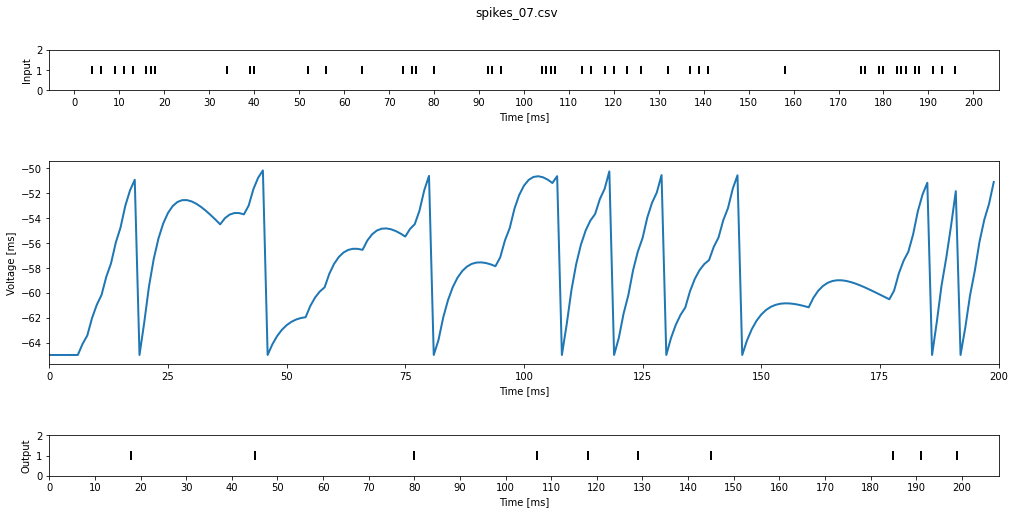

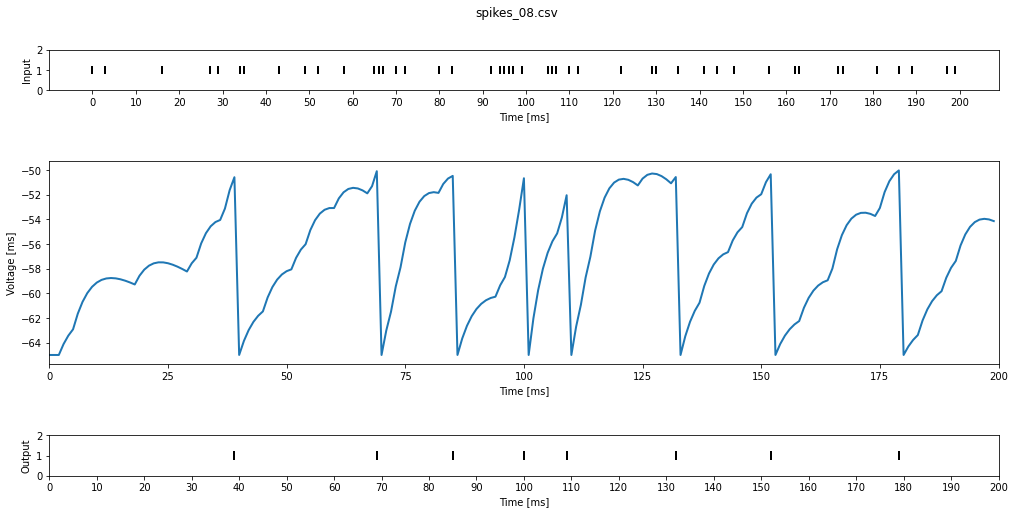

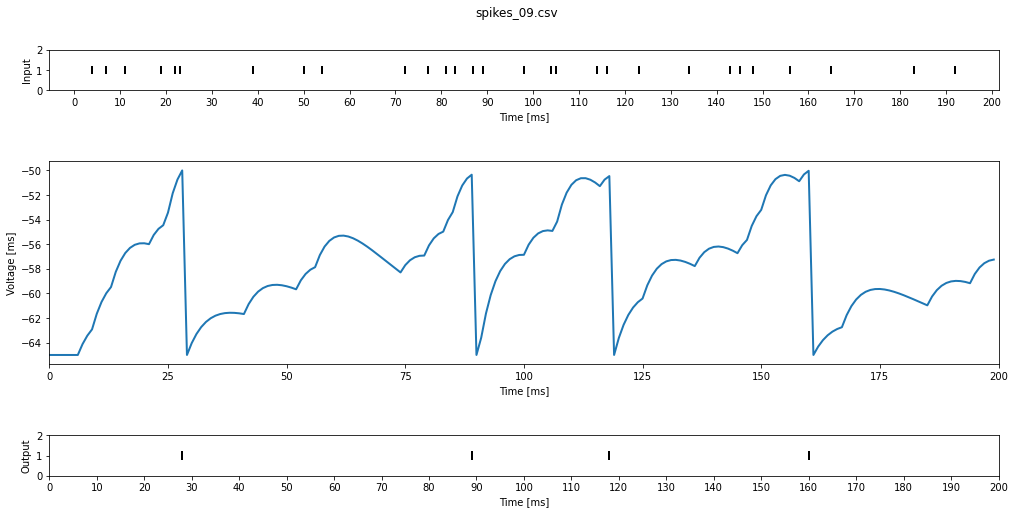

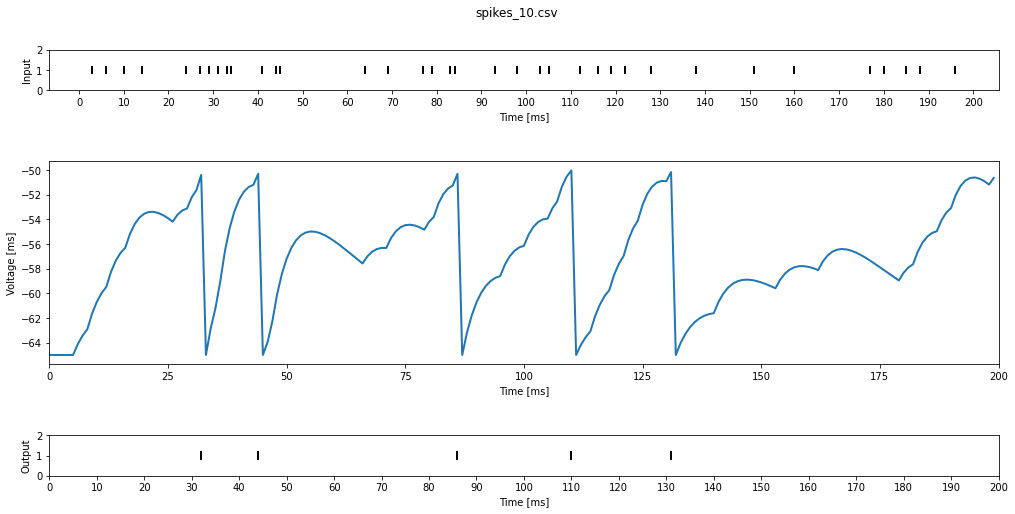

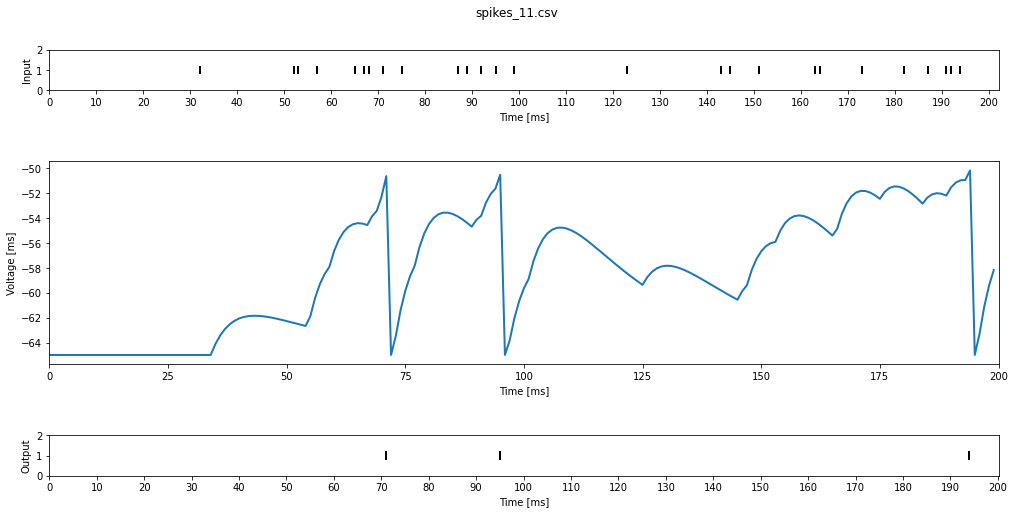

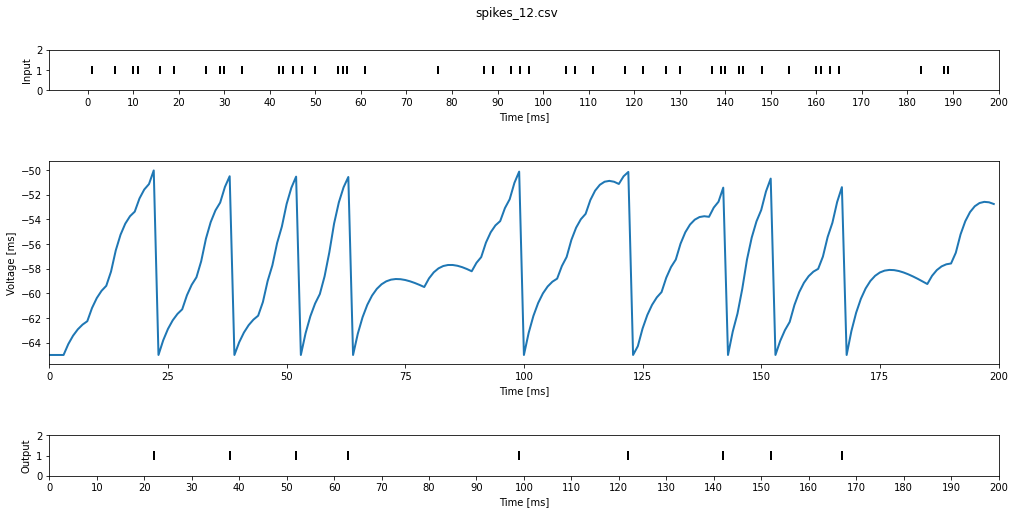

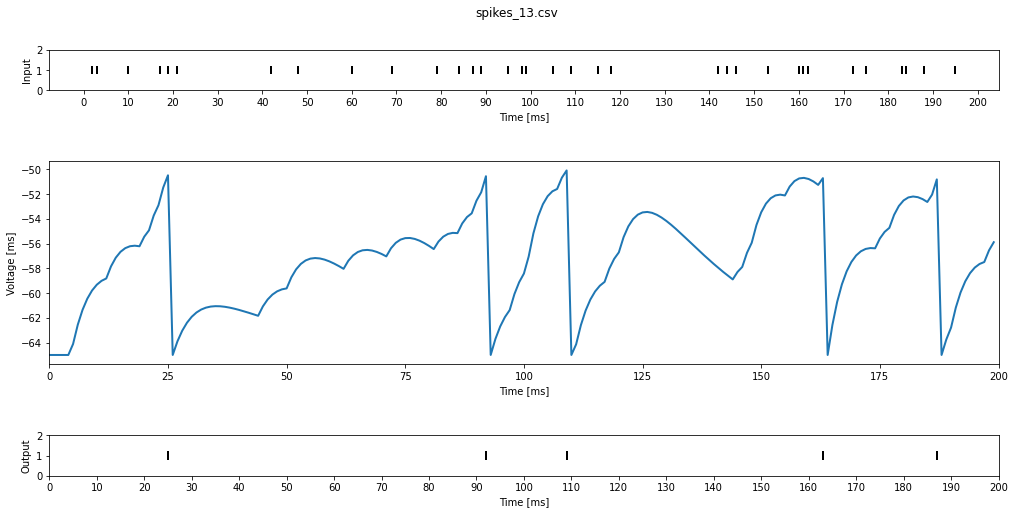

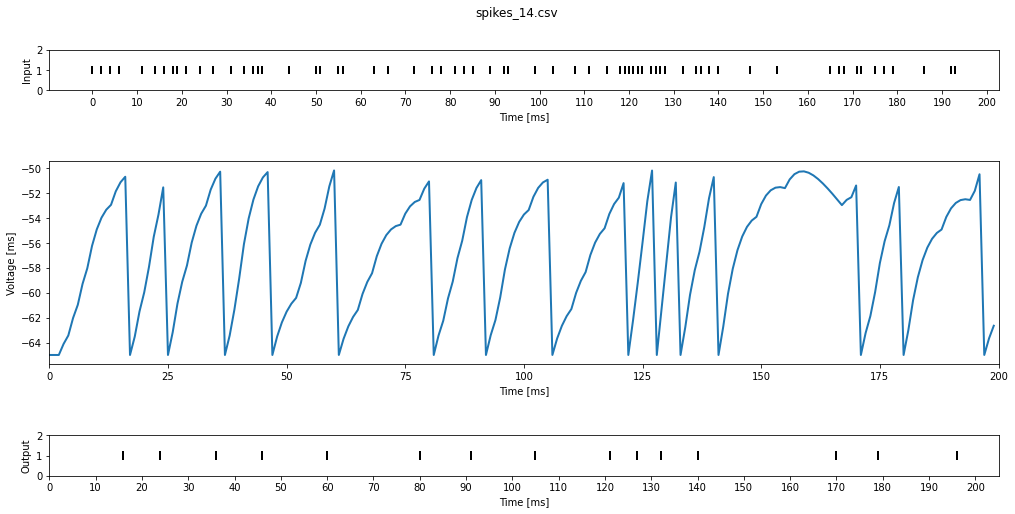

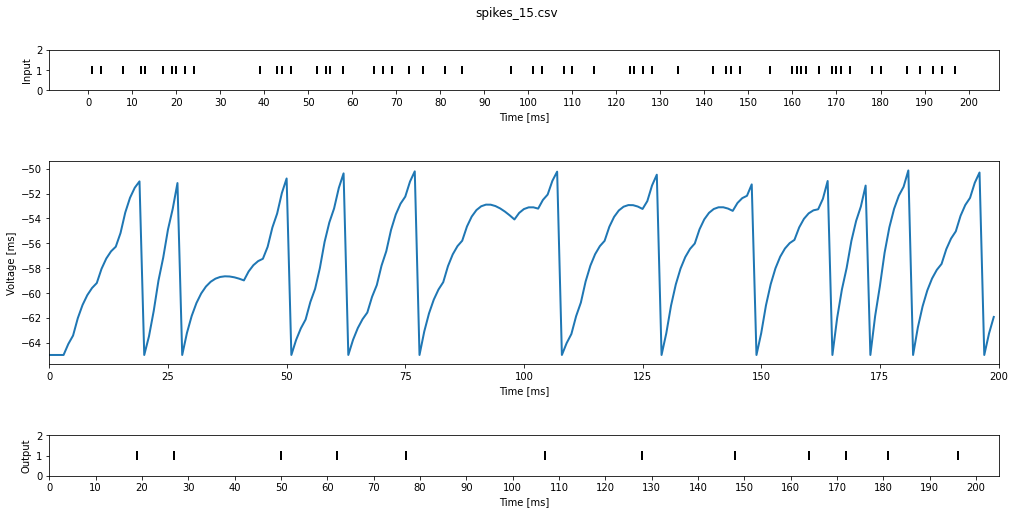

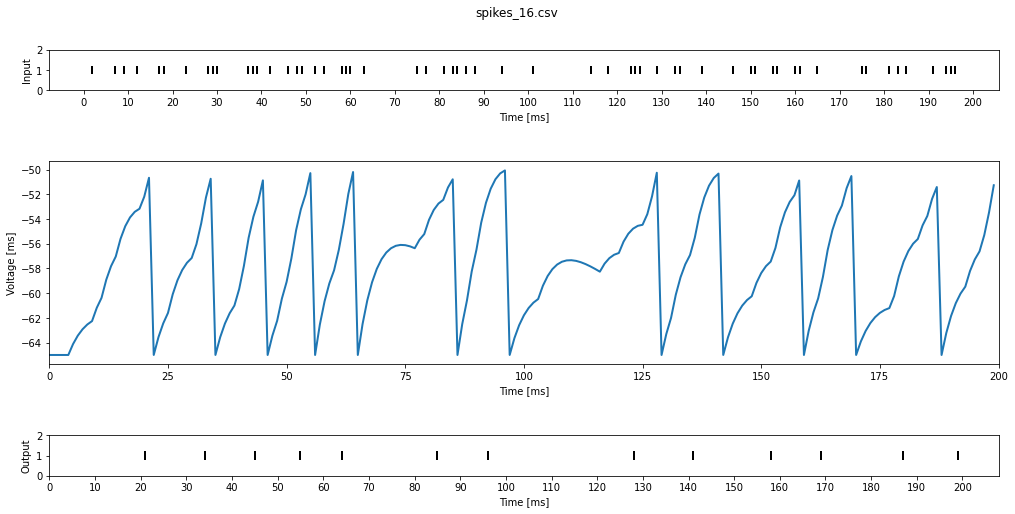

In [3]:

#Fetch available trains of spikes in path

path = "input/"
files = fetch_files(path) 

#Simulate for each input file + Plot + Save data

n = len(files)
for i in range(n):
        
    #SpiNNaker Setup
    delay = 2*dt
    node_id = p.setup(timestep=dt, min_delay=delay, max_delay=delay)     
    p.set_number_of_neurons_per_core(p.IF_curr_exp, 100) #  100 neurons per core
    
    # Get Input Spikes from file
    f_name = files[i]
    sfn = f_name.replace(path, "")

    i_spikes = genfromtxt(files[i], delimiter=',')
    i_indexes = np.where(i_spikes>0)
    nb_steps = len(i_spikes)

    # Populations
    celltype = p.IF_curr_exp
    cells_l1 = p.Population(1, celltype(**cell_params), label="Layer_1")

    spike_train_1 = p.SpikeSourceArray(spike_times=(i_indexes))
    cells_l0 = p.Population(1,spike_train_1)

    # Connectivity
    cell_conn = p.AllToAllConnector()
    connections = { 'i1l1': p.Projection(cells_l0, cells_l1, cell_conn,
                            receptor_type='excitatory',
                            synapse_type=p.StaticSynapse(weight=w, delay=delay))}

    # Setup recording 
    cells_l1.record(["v","spikes"])
    cells_l0.record(["spikes"])

    # Run simulation 
    p.run(nb_steps)

    # Print results to file 

    l1_voltage = cells_l1.get_data("v")
    l1_spikes = cells_l1.get_data("spikes")
    in_spikes = cells_l0.get_data("spikes")

    # Finished with simulator 
    p.end()
    time.sleep(10)
    v_array = np.array(l1_voltage.segments[0].filter(name="v")[0]).reshape(-1)

    i_indexes = np.asarray(in_spikes.segments[0].spiketrains[0])
    o_indexes = np.asarray(l1_spikes.segments[0].spiketrains[0])

    o_spikes = np.zeros(nb_steps)
    for i in o_indexes.astype(int):
        o_spikes[i] = 1

    np.savetxt("summary/spinnaker/" + "voltage_" + sfn, v_array, delimiter=",")
    np.savetxt("summary/spinnaker/" + "output_" + sfn, o_spikes, delimiter=",")

    xlim = len(i_spikes)
    plot_in_v_out(i_indexes, v_array, o_indexes, sfn, xlim)